In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
dataset = pd.read_csv('insurance_pre.csv')

In [ ]:
dataset


,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [ ]:
datasets=pd.get_dummies(dataset,drop_first=True)

In [ ]:
datasets

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False
1334,18,31.920,0,2205.98080,False,False
1335,18,36.850,0,1629.83350,False,False
1336,21,25.800,0,2007.94500,False,False


In [ ]:
indep=datasets[['age','bmi','children','sex_male','smoker_yes']]
dep=datasets[['charges']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size = 1/3, random_state = 0)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='poisson', splitter='random')
regressor=regressor.fit(X_train,y_train)

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [ ]:
r_score

0.7785593073889495

In [ ]:
regressor.feature_importances_

array([0.22774953, 0.1644825 , 0.03315738, 0.01895403, 0.55565657])

In [ ]:
regressor.max_features_

5

In [ ]:
regressor.tree_

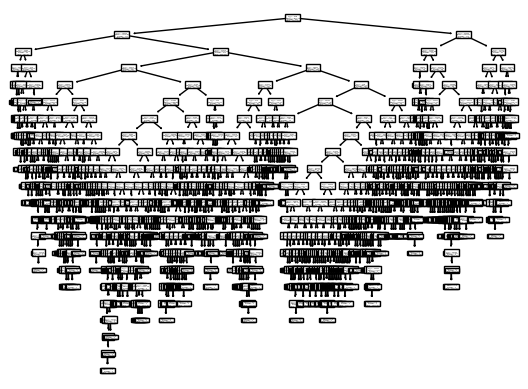

In [ ]:
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [ ]:
age_input=float(input("Age:"))
bmi_input=float(input("BMI:"))
children_input=float(input("Children:"))
sex_male_input=float(input("Sex Male 0 or 1:"))
smoker_yes_input=float(input("Smoker Yes 0 or 1:"))

Age:63
BMI:36.85
Children:0
Sex Male 0 or 1:1
Smoker Yes 0 or 1:0


In [ ]:
result=regressor.predict([[age_input, bmi_input, children_input, sex_male_input, smoker_yes_input]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
result

array([13981.85035])